In [19]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf



In [10]:
# You only need to run this once, this is default commented out for this reason
# Creates cleaned_df.pkl in the data folder
#%run ./data/cleaning_script.py


In [13]:
df = pd.read_pickle('data/cleaned_df.pkl')

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing'],
      dtype='object')

In [18]:

df.iat[8748, 3] = 4
df.iat[15856, 3] = 3
df.sort_values('bedrooms', ascending=False)
df['bedrooms_per_sf'] = df.bedrooms/df.sqft_living
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing', 'bedrooms_per_sf'],
      dtype='object')

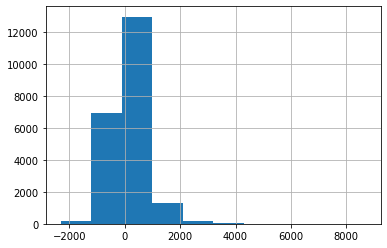

In [31]:
#np.log(df.sqft_living).hist()
df['log_sqft_living'] = np.log(df.sqft_living)
df['diff_lsf_neighbors'] = df.sqft_living - df.sqft_living15
df.diff_lsf_neighbors.hist()

In [54]:
mean_log_sqft_living = df.log_sqft_living.mean()
sigma_log_sqft_living = df.log_sqft_living.std()
df['log_normal_sf_living'] = (df.log_sqft_living - mean_log_sqft_living) / sigma_log_sqft_living

In [55]:
mean_sqft_living = df.sqft_living.mean()
sigma_sqft_living = df.sqft_living.std()
df['normal_sf_living'] = (df.sqft_living - mean_sqft_living) / sigma_sqft_living

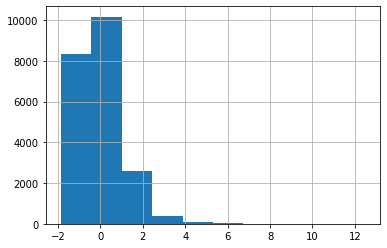

In [52]:
df.normal_sf_living.hist()

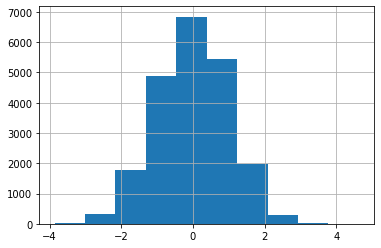

In [56]:
df.log_normal_sf_living.hist()

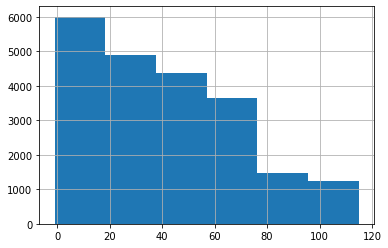

In [73]:
df.effective_age.hist(bins=6)

In [80]:
model = smf.ols('price ~ sqft_living*grade', data=df)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:40:27   Log-Likelihood:            -2.9760e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21593   BIC:                         5.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           4.17e+05   2.17e+04     19.205      0.000    3.74e+05     4.6e+05
sqft_living        -303.9983      8.933    -34.033      0.000    -321.507    -286.490
grade             -2.416e+04   3004.795     -8.040      0.000      -3e+04   -1.83e+04
sqft_living:grade    56.1517      0.980     57.277      0.000      54.230      58.073
==============================================================================
Omnibus:                    11294.712   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259261.066
Skew:                           2.024   Prob(JB):                         0.00
Kurtosis:                      19.484   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

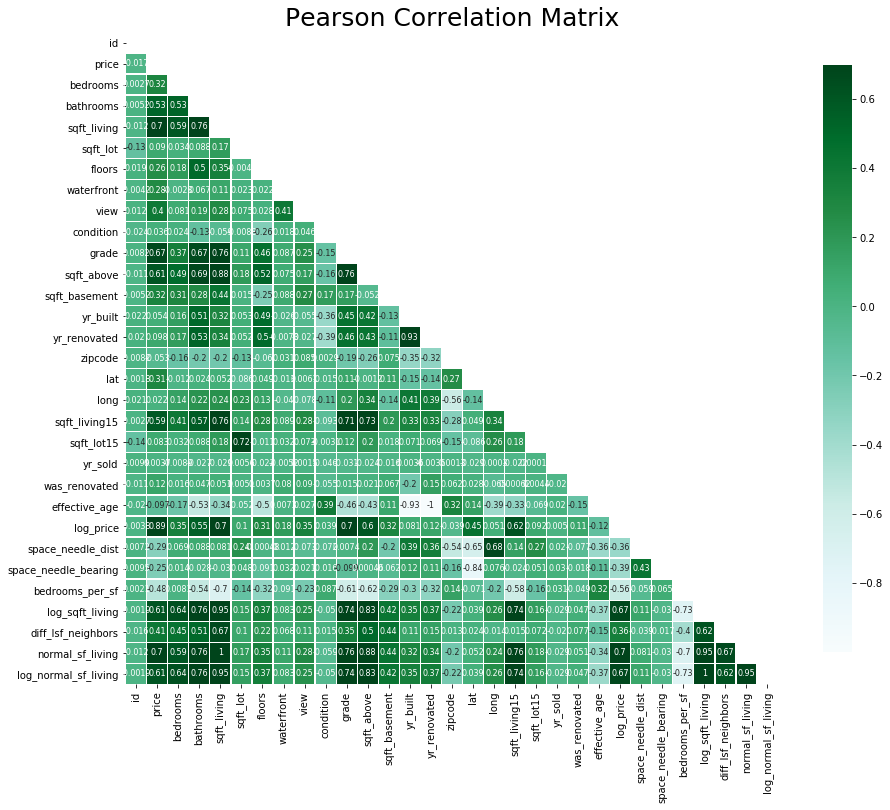

In [74]:
features = list(df.columns)

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});


In [81]:
df['split_level'] = df.floors % 1.0
df.split_level.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [82]:
df['split_level'] = df.floors % 1.0
df.split_level.value_counts()

0.0    19519
0.5     2078
Name: split_level, dtype: int64

In [88]:
model = smf.ols('price ~ floors*sqft_living', data=df)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7177.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:58:59   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21593   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.47e+05   1.31e+04     11.204      0.000    1.21e+05    1.73e+05
floors             -1.161e+05   8105.759    -14.327      0.000   -1.32e+05      -1e+05
sqft_living          173.0898      6.669     25.956      0.000     160.019     186.161
floors:sqft_living    62.9601      3.752     16.779      0.000      55.605      70.315
==============================================================================
Omnibus:                    14232.934   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467640.152
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      25.150   Cond. No.                     3.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


lat_long_logprice = df[['lat', 'long', 'log_price']]
data_scaled = scaler.fit_transform(lat_long_logprice)

pd.DataFrame(data_scaled).describe()

kmeans = KMeans(n_clusters=6, init='k-means++')

kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
kmeans.inertia_

18492.07388582614

Text(0, 0.5, 'Inertia')

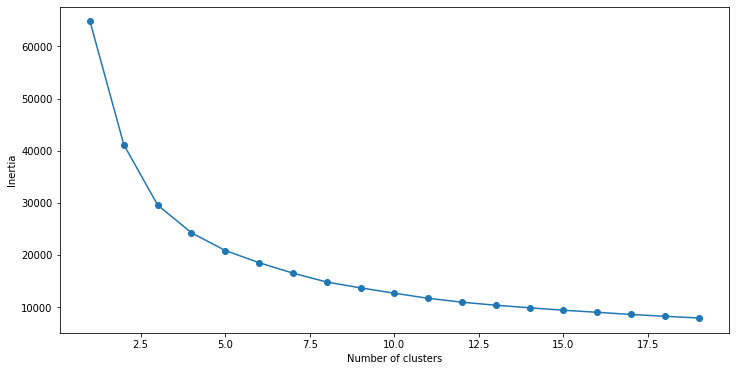

In [93]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [119]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

centers = kmeans.cluster_centers_
centers_frame = pd.DataFrame(scaler.inverse_transform(centers), columns=['klat', 'klong', 'log'])[['klat','klong']]
centers_frame


,klat,klong
0,47.608804,-122.030327
1,47.432246,-122.315756
2,47.675920,-122.312612
3,47.617294,-122.251658
4,47.383268,-122.122767


In [124]:
def distance_from(flat, flong, lat, long):
    """return 'as the crow flies' distance in miles from the 
    space needle, given latitude and longitude coordinates of a location"""
    # Convert lat/longitudes to radians
    def to_radians(latlong):
        return latlong / 57.29577951
    # lat/long of input
    loc_lat = to_radians(lat)
    loc_long = to_radians(long)
    c_lat = to_radians(flat)
    c_long = to_radians(flong)
    # distance in miles
    d = 3963.0 * np.arccos((np.sin(c_lat) * np.sin(loc_lat))\
                           + np.cos(c_lat) * np.cos(loc_lat)\
                           * np.cos(loc_long - c_long))
    return d

# Create Distance from Space Needle Column:


# Create a Function for computing the bearing relative from space needle
# of a given lat/long point
def bearing_from(flat, flong, lat, long):
    """return bearing theta in radians for given location's
    bearing relative to the space needle. Takes latitude and longitude
    of the location."""
    delta_fi = np.log(np.tan(flat / 2 + np.pi/4) / np.tan(lat / 2 + np.pi/4))
    delta_lon = abs(flong - long)
    bearing = np.arctan2(delta_lon, delta_fi)
    return bearing

In [128]:
df['dist_c0'] = distance_from(centers_frame['klat'][0], centers_frame['klong'][0], df.lat, df.long)
df['bear_c0'] = bearing_from(centers_frame['klat'][0], centers_frame['klong'][0], df.lat, df.long)
df['dist_c1'] = distance_from(centers_frame['klat'][1], centers_frame['klong'][1], df.lat, df.long)
df['bear_c1'] = bearing_from(centers_frame['klat'][1], centers_frame['klong'][1], df.lat, df.long)
df['dist_c2'] = distance_from(centers_frame['klat'][2], centers_frame['klong'][2], df.lat, df.long)
df['bear_c2'] = bearing_from(centers_frame['klat'][2], centers_frame['klong'][2], df.lat, df.long)
df['dist_c3'] = distance_from(centers_frame['klat'][3], centers_frame['klong'][3], df.lat, df.long)
df['bear_c3'] = bearing_from(centers_frame['klat'][3], centers_frame['klong'][3], df.lat, df.long)
df['dist_c4'] = distance_from(centers_frame['klat'][4], centers_frame['klong'][4], df.lat, df.long)
df['bear_c4'] = bearing_from(centers_frame['klat'][4], centers_frame['klong'][4], df.lat, df.long)
df.drop(columns=['split_level', 'cluster_db'], inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dist_c0,bear_c0,dist_c1,bear_c1,dist_c2,bear_c2,dist_c3,bear_c3,dist_c4,bear_c4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,12.550440,2.014515,6.113078,0.610313,11.684807,2.849641,7.342505,3.096109,10.850047,0.782414
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,15.525501,1.144767,19.972959,0.010050,3.132237,0.118382,7.828868,0.506492,25.091968,0.483435
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,12.993537,0.928694,21.490952,0.236536,5.666482,0.820113,8.387110,0.130699,25.062752,0.272578
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,17.987558,1.833054,7.110325,0.685777,11.365488,2.710222,9.383684,2.218666,15.818996,1.077099
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.879743,1.017788,17.968713,0.932645,13.123592,1.820464,9.635404,1.573512,16.556511,0.299508


In [158]:
model = smf.ols('log_price ~ sqft_living  + dist_c1*bear_c1 + dist_c2*bear_c2 + dist_c3*bear_c3 + dist_c4*bear_c4', data=df)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     6860.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:02:37   Log-Likelihood:                 869.15
No. Observations:               21597   AIC:                            -1710.
Df Residuals:                   21583   BIC:                            -1599.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2241      0.032    418.088      0.000      13.162      13.286
sqft_living         0.0004   1.85e-06    193.241      0.000       0.000       0.000
dist_c1            -0.0212      0.002    -10.189      0.000      -0.025      -0.017
bear_c1             0.2239      0.008     28.851      0.000       0.209       0.239
dist_c1:bear_c1     0.0280      0.001     23.548      0.000       0.026       0.030
dist_c2             0.0733      0.004     18.413      0.000       0.065       0.081
bear_c2             0.1198      0.006     19.119      0.000       0.108       0.132
dist_c2:bear_c2    -0.0514      0.002    -32.362      0.000      -0.055      -0.048
dist_c3            -0.1044      0.004    -26.909      0.000      -0.112      -0.097
bear_c3            -0.2074      0.010    -21.660      0.000      -0.226      -0.189
dist_c3:bear_c3     0.0235      0.002     13.744      0.000       0.020       0.027
dist_c4            -0.0065      0.001     -5.126      0.000      -0.009      -0.004
bear_c4             0.1284      0.008     15.358      0.000       0.112       0.145
dist_c4:bear_c4     0.0200      0.001     26.173      0.000       0.018       0.021
==============================================================================
Omnibus:                     1593.331   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8616.986
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                       6.090   Cond. No.                     4.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

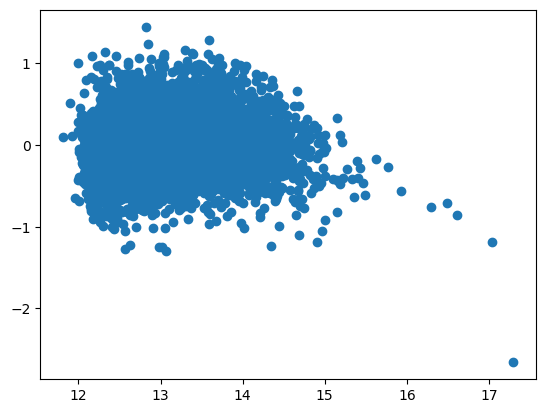

In [167]:
x_preds = df[['sqft_living', 'dist_c1', 'bear_c1', 'dist_c2', 'bear_c2', 'dist_c3', 'bear_c3', 'dist_c4', 'bear_c4']]
y_actual = df['log_price']
model_predictions = fitted_model.predict(x_preds)
residuals = y_actual - model_predictions
plt.scatter(model_predictions, residuals)


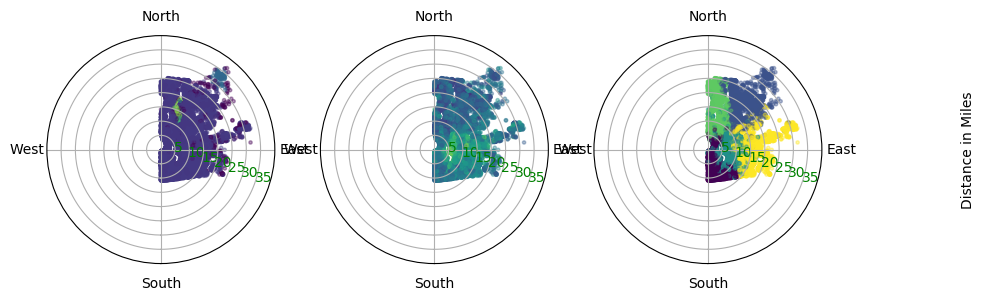

In [107]:
df['cluster'] = pred

df['log10_price'] = np.log10(df.price)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('seaborn-white')
r = df.space_needle_dist
theta = df.space_needle_bearing
area = df.log10_price
colors = df.cluster_db
colors2 = df.cluster


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(131, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, alpha=0.4 )
ax.set_theta_zero_location('W', offset=90)
ax.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
ax.set_xticklabels(['South','East', 'North', 'West'])
#ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_rmax(40)
#ax.set_tickparams(axis='y', colors='red')
#ax.r_label_position('right')
ax.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
ax.set_ylabel('Distance in Miles', labelpad=100)
ax.yaxis.set_label_position('right')
#ax.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')




ax1 = fig.add_subplot(132, projection='polar')
c2 = ax1.scatter(theta, r, c=area, s=area, alpha=0.4)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
ax1.set_xticklabels(['South','East', 'North', 'West'])
#ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
ax1.set_rmax(40)
#ax.set_tickparams(axis='y', colors='red')
#ax.r_label_position('right')
ax1.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
ax1.set_ylabel('Distance in Miles', labelpad=100)
ax1.yaxis.set_label_position('right')
#ax1.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')

ax3 = fig.add_subplot(133, projection='polar')
c3 = ax3.scatter(theta, r, c=colors2, s=area, alpha=0.4)
ax3.set_theta_zero_location('W', offset=90)
ax3.set_xticks(np.array([0, 90, 180, 270])*np.pi/180)
ax3.set_xticklabels(['South','East', 'North', 'West'])
#ax.set_rticks([0,5,10,15,20,25,30,35,40,45,50])
ax3.set_rmax(40)
#ax.set_tickparams(axis='y', colors='red')
#ax.r_label_position('right')
ax3.set_rgrids([5,10,15,20,25,30,35], angle=70, color='green')
ax3.set_ylabel('Distance in Miles', labelpad=100)
ax3.yaxis.set_label_position('right')
#ax.set_title('Distance and Direction from Space Needle, colored by Log 10 Sale Price')



In [104]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


lat_long_logprice = df[['lat', 'long', 'log_price']]
data_scaled = scaler.fit_transform(lat_long_logprice)


db = DBSCAN(eps=0.3, min_samples=10).fit(data_scaled)

labels = db.labels_

df['cluster_db'] = labels

df.head()




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,space_needle_bearing,bedrooms_per_sf,log_sqft_living,diff_lsf_neighbors,normal_sf_living,log_normal_sf_living,split_level,cluster,log10_price,cluster_db
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,2.489966,0.002542,7.073270,-160,-0.980629,-1.125556,0.0,3,5.346157,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0.251870,0.001167,7.851661,880,0.533357,0.709446,0.0,0,5.730782,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.699198,0.002597,6.646391,-1950,-1.427201,-2.131893,0.0,0,5.255273,-1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,2.765356,0.002041,7.580700,600,-0.131054,0.070674,0.0,0,5.781037,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1.584611,0.001786,7.426549,-120,-0.436030,-0.292725,0.0,4,5.707570,0


In [108]:
df.cluster_db.value_counts()

 0    20862
-1      465
 1      198
 4       35
 3       21
 2       11
 5        5
Name: cluster_db, dtype: int64

In [149]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'was_renovated', 'effective_age', 'log_price', 'space_needle_dist',
       'space_needle_bearing', 'bedrooms_per_sf', 'log_sqft_living',
       'diff_lsf_neighbors', 'normal_sf_living', 'log_normal_sf_living',
       'cluster', 'log10_price', 'dist_c0', 'bear_c0', 'dist_c1', 'bear_c1',
       'dist_c2', 'bear_c2', 'dist_c3', 'bear_c3', 'dist_c4', 'bear_c4'],
      dtype='object')